In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as pyplt
import tensorflow as tf
import numpy as np
import os
import cv2


In [33]:
# img = image.load_img("images/one/image0.png")
# pyplt.imshow(img)
# cv2.imread("images/one/image0.png").shape

data = ImageDataGenerator(rescale=1/225)
dataset = data.flow_from_directory("images/",
                                   target_size=(200,200),
                                   batch_size=3,
                                   class_mode ='binary'
)
# dataset.classes
# dataset.class_indices
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(52,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512,activation="relu"),
    
    tf.keras.layers.Dense(1,activation="sigmoid"),
    
    
])


Found 34 images belonging to 2 classes.


In [42]:
model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=["accuracy"]
             )

In [43]:
model.fit(dataset,
         epochs=30,
         )

Epoch 1/30
12/12 [==============================] - 7s 311ms/step - loss: 0.8738 - accuracy: 0.5000
Epoch 2/30
12/12 [==============================] - 3s 286ms/step - loss: 0.7007 - accuracy: 0.4412
Epoch 3/30
12/12 [==============================] - 3s 286ms/step - loss: 0.6636 - accuracy: 0.6176
Epoch 4/30
12/12 [==============================] - 3s 286ms/step - loss: 0.6305 - accuracy: 0.7059
Epoch 5/30
12/12 [==============================] - 4s 291ms/step - loss: 0.5972 - accuracy: 0.6765
Epoch 6/30
12/12 [==============================] - 4s 297ms/step - loss: 0.5877 - accuracy: 0.7353
Epoch 7/30
12/12 [==============================] - 4s 302ms/step - loss: 0.5182 - accuracy: 0.8529
Epoch 8/30
12/12 [==============================] - 3s 288ms/step - loss: 0.4851 - accuracy: 0.8235
Epoch 9/30
12/12 [==============================] - 3s 286ms/step - loss: 0.4258 - accuracy: 0.7647
Epoch 10/30
12/12 [==============================] - 3s 288ms/step - loss: 0.3616 - accuracy: 0.9412

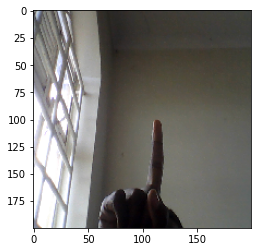

That is One


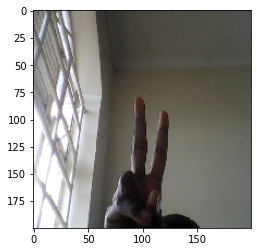

That is two


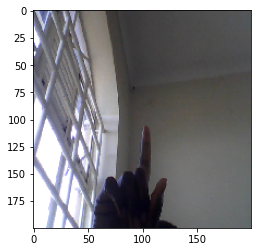

I do not know


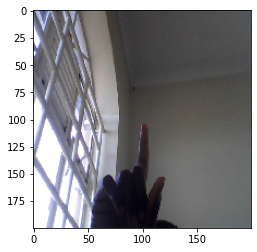

That is One


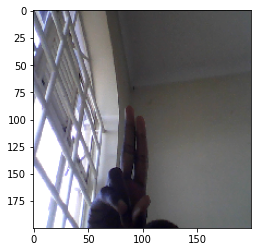

That is two


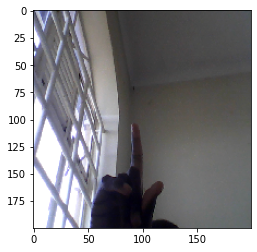

That is One


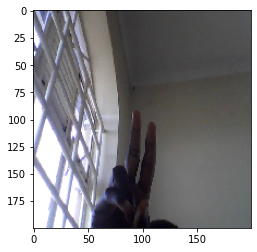

That is two


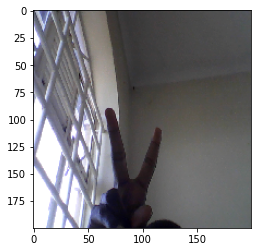

That is two


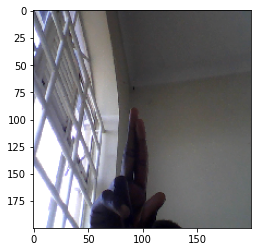

That is two


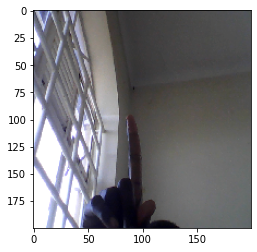

That is One


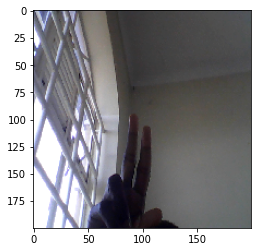

I do not know


In [75]:
loc = os.listdir("test")
for i in os.listdir("test"):
    openimg = image.load_img("test/"+i +" ",target_size=(200,200,3))
    pyplt.imshow(openimg)
    pyplt.show()
    
    X = image.img_to_array(openimg)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    predicting = model.predict(images)
#     print(predicting)
    if predicting == 0:
        print("That is One")
    elif predicting == 1:
        print("That is two")
    else:
        print("I do not know")
    

In [73]:
model.save("number_model.h5")